# Quickstart

This tutorial will guide you through the basic concepts of `Effector`.
`Effector` require two things:

- a `np.array` of shape `(N, D)` --- typically, it is the test set
- a `Callable: f(x: np.array) -> np.array` -- the black-box function to explain


In [1]:
import effector
import numpy as np

np.random.seed(21)

X = np.random.uniform(-1, 1, (1000, 2))
f = lambda x: x[:, 0]**2 + x[:, 0]**4 * (x[:, 1] > 0)
axis_limits = np.array([[-1, -1], [1, 1]])


## Global Effect

To get the global effect plot of a feature, simply choose a method and run the `plot` method. The available methods are: `PDP`, `RHALE`, `ALE`, `ShapDP`, `DerPDP`, `ShapDP`.

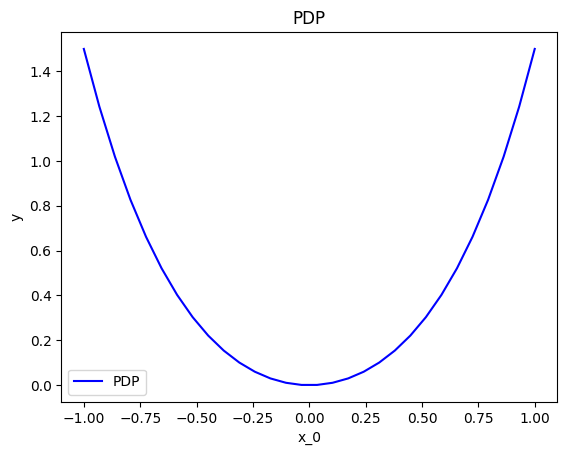

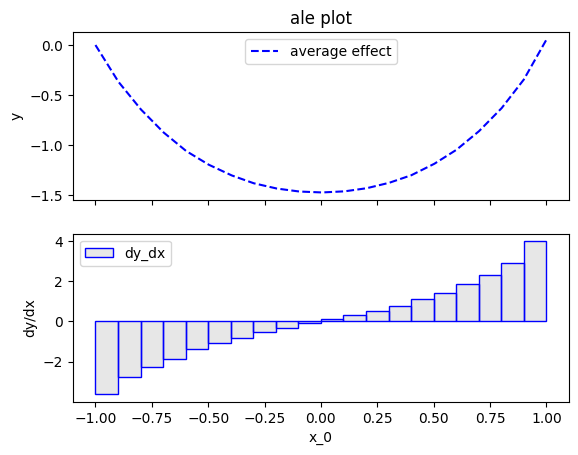

In [2]:
effector.PDP(X, f, axis_limits=axis_limits).plot(feature=0)
effector.ALE(X, f, axis_limits=axis_limits).plot(feature=0)

All methods have two key parameters: `centering` and `heterogeneity`.

### `centering`

Note above, that PDP and ALE plots are at a different y-axis level.
This happens because each feature effect method has its own centering.

To facilitate comparisons, use the `centering` parameter:

- `centering=True` or `centering="zero_integral"` centers the plot around the y-axis.
- `centering="zero_start"` sets the leftmost point at y=0.

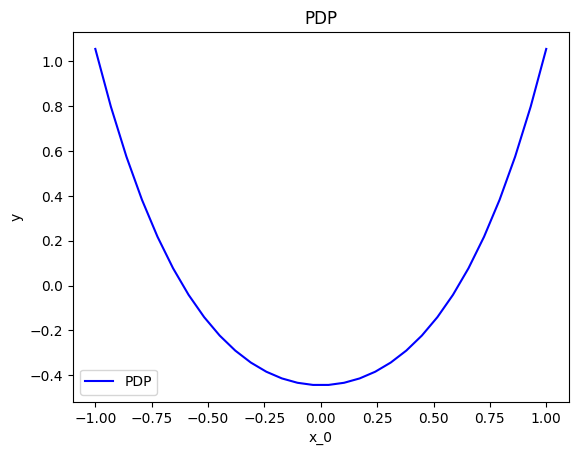

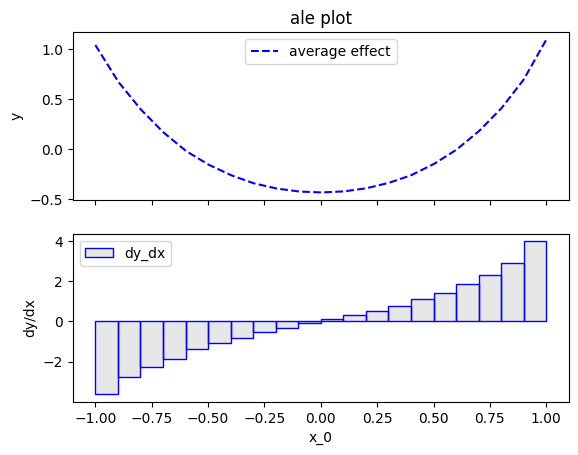

In [3]:
# Important parameters: Centering
effector.PDP(X, f, axis_limits=axis_limits).plot(feature=0, centering=True)
effector.ALE(X, f, axis_limits=axis_limits).plot(feature=0, centering=True)

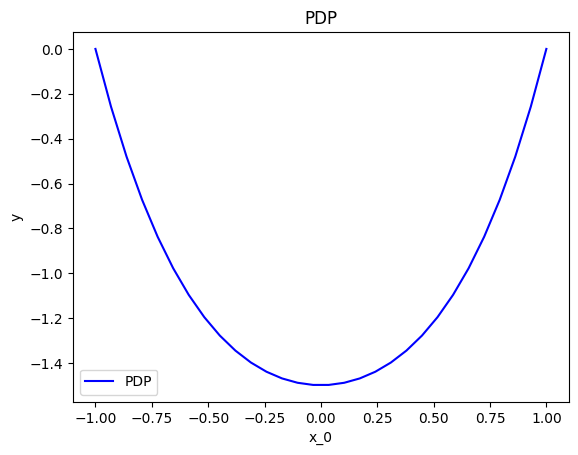

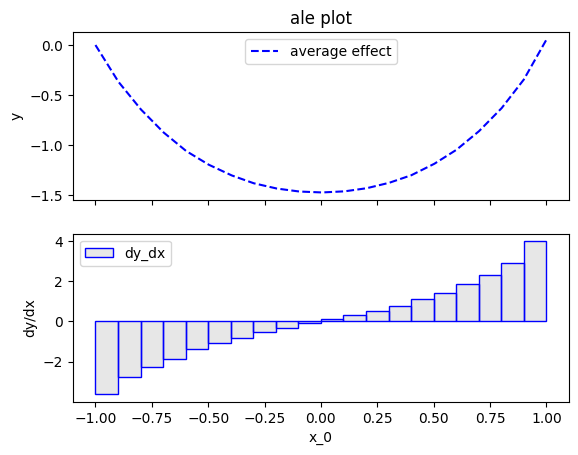

In [4]:
effector.PDP(X, f, axis_limits=axis_limits).plot(feature=0, centering="zero_start")
effector.ALE(X, f, axis_limits=axis_limits).plot(feature=0, centering="zero_start")

### `heterogeneity`

The global effect is simply the average effect of a particular feature on the output.
The heterogeneity shows the amount of deviation from this average effect.
In other words, it shows whether there are instances whose effect is significantly different from the global effect.

To visualize heterogeneity, set `heterogeneity=True` within the `.plot` call. This will display a red region highlighting heterogeneity; the visualization style varies by method, but all methods support this parameter.

Some methods have specific (and possible more informative) ways to illustrate the heterogeneity. For example, PDP uses ICE plots.
In such cases, the `heterogeneity` parameter may be set to method-dependent string, like `heterogeneity="ice"` for PDP.

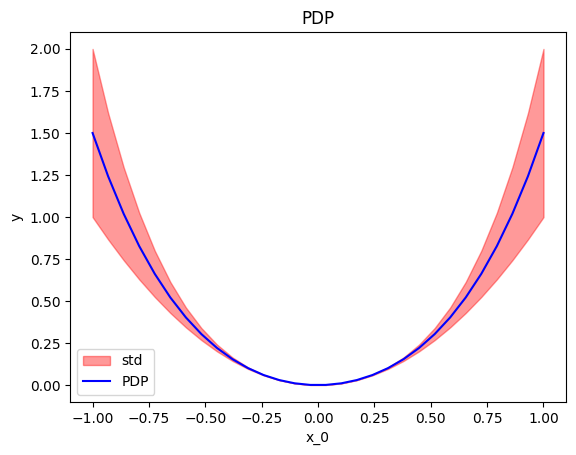

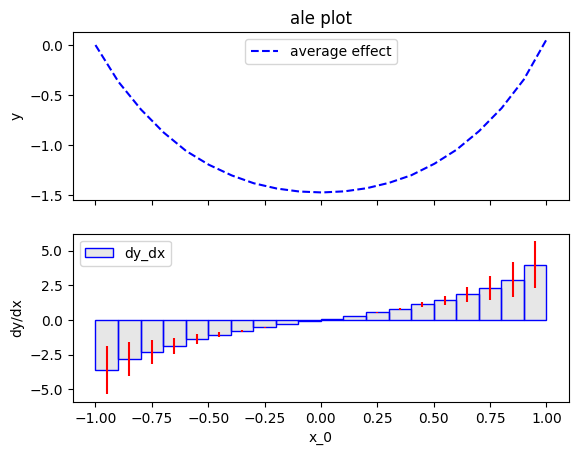

In [5]:
effector.PDP(X, f, axis_limits=axis_limits).plot(feature=0, heterogeneity=True)
effector.ALE(X, f, axis_limits=axis_limits).plot(feature=0, heterogeneity=True)

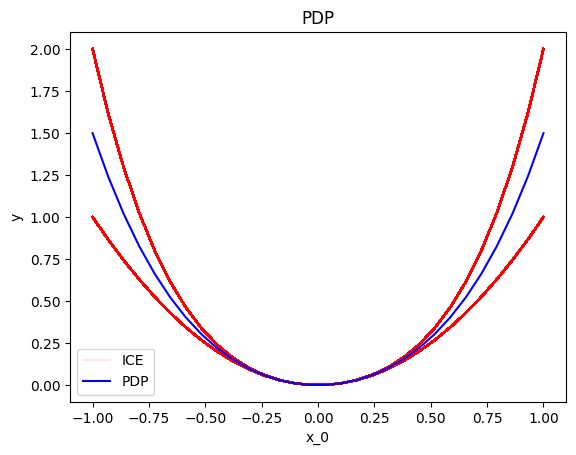

In [6]:
effector.PDP(X, f, axis_limits=axis_limits).plot(feature=0, heterogeneity="ice")

## Regional Effect

To get the regional effects for a particular feature, simply choose a method and run the `summary` method.

The available methods are the regional counterparts of global methods: `RegionalPDP`, `RegionalALE`, `RegionalShapDP`, `RegionalDerPDP`, `RegionalShapDP`.

In [7]:
effector.RegionalPDP(X, f, axis_limits=axis_limits).summary(features=0)

100%|██████████| 1/1 [00:00<00:00, 91.47it/s]



Feature 0 - Full partition tree:
Node id: 0, name: x_0, heter: 0.03 || nof_instances:  1000 || weight: 1.00
        Node id: 1, name: x_0 | x_1 <= 0.0, heter: 0.00 || nof_instances:   501 || weight: 0.50
        Node id: 2, name: x_0 | x_1  > 0.0, heter: 0.00 || nof_instances:   499 || weight: 0.50
--------------------------------------------------
Feature 0 - Statistics per tree level:
Level 0, heter: 0.03
        Level 1, heter: 0.00 || heter drop : 0.03 (units), 100.00% (pcg)




The `summary` method displays detected subregions (if any) and their heterogeneity.  

In the example above, for `feature=0`, two subregions are found: one for \(x_1 < 0\) and one for \(x_1 \geq 0\). Before splitting, heterogeneity is `0.03`, but after splitting, it drops to zero within each subregion.  

Each subregion is a node in a partition tree with a unique `node_id`. For example:

- \(x_1 < 0\) → `node_id=1`  
- \(x_1 \geq 0\) → `node_id=2`  

To get a subregion's effect, use the `plot` method with its `node_id`.

100%|██████████| 1/1 [00:00<00:00, 90.08it/s]


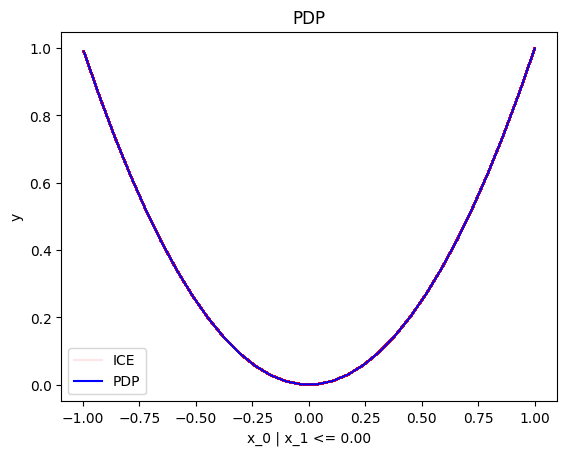

In [8]:
effector.RegionalPDP(X, f, axis_limits=axis_limits).plot(feature=0, node_idx=1, heterogeneity="ice")

100%|██████████| 1/1 [00:00<00:00, 99.23it/s]


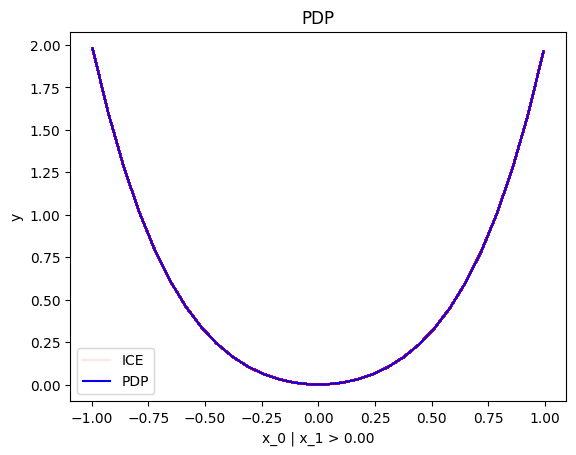

In [9]:
effector.RegionalPDP(X, f, axis_limits=axis_limits).plot(feature=0, node_idx=2, heterogeneity="ice")

Inside each subregion, all instances match the average heterogeneity, making the heterogeneity zero.  

To compare with the global effect, use `node_idx=0`, as this represents the parent node before any partitioning.

100%|██████████| 1/1 [00:00<00:00, 89.39it/s]


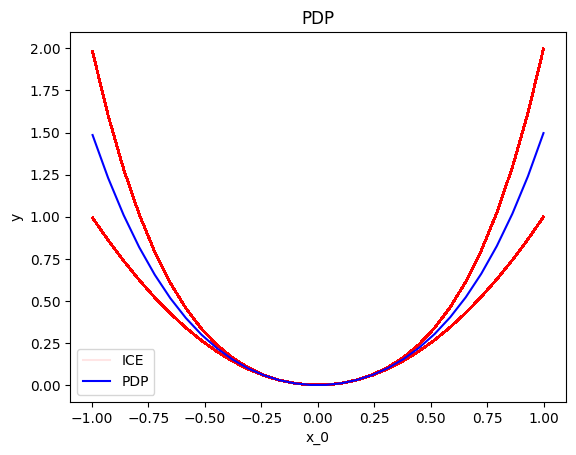

In [10]:
effector.RegionalPDP(X, f, axis_limits=axis_limits).plot(feature=0, node_idx=0, heterogeneity="ice")